<a href="https://colab.research.google.com/github/nico-carri/challenge-alura-store-/blob/main/Challenge_TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Predicción de Churn en Telecom
En este notebook vamos a:
- Explorar y limpiar los datos de clientes de una empresa de TelecomX.
- Realizar un análisis exploratorio (EDA).
- Preparar los datos para modelado (preprocesamiento).
- Entrenar y evaluar varios modelos de machine learning.
- Obtener conclusiones y recomendaciones.

**Variable objetivo:** `Churn` (indica si el cliente abandonó o no el servicio).


##📌 EXTRACCIÓN

In [ ]:
# === Importar librerías ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


 — Configuración de gráficos

In [ ]:
# === Configuración de gráficos ===
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

 —  Exploración inicial

In [ ]:
# Información general
df.info()

# Resumen estadístico (solo numéricas)
df.describe()

# Valores nulos por columna
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##🛠️ Preparación de los Datos


/tmp/ipython-input-1628529355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


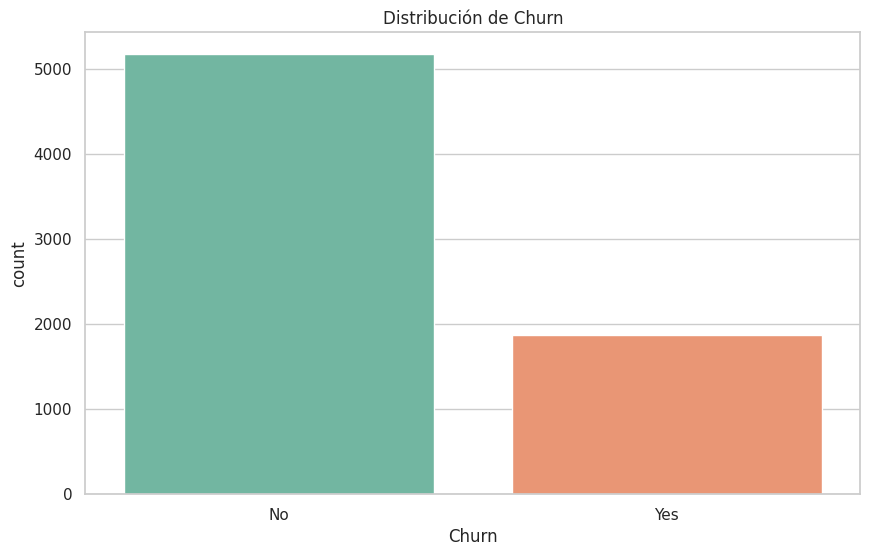

In [ ]:
# Distribución de la variable objetivo
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Distribución de Churn")
plt.show()

In [ ]:
df = df.drop(columns=['customerID'])

\ ✔️ Agrupación de No y No service

## 🔄 Preprocesamiento de variables categóricas

En este paso:
1. Agrupamos valores redundantes como `"No internet service"` → `"No"`.
2. Realizamos **One-Hot Encoding** para convertir variables categóricas en numéricas.
3. Preparamos el dataframe codificado (`df_encoded`) para análisis y modelado.

In [ ]:
# creo un df nuevo
df_clean = df.copy()

# === Paso 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Paso 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Listo para usar
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

✔️ Verificación nuevamente de los valores nulos

## 🧹 Tratamiento de valores nulos

En este paso:
1. Verificamos si existen valores nulos en el dataset codificado.
2. Eliminamos registros con nulos en columnas clave (`Total.Day` y `account.Charges.Total`).
3. Confirmamos que el dataset queda limpio.

Luego pasamos a la **normalización** de variables numéricas con `MinMaxScaler` para escalar todos los valores en el rango `[0, 1]`.


In [ ]:
# Verificar estructura y tipos de datos
df_encoded.info()

# Verificar nulos por columna
df_encoded.isnull().sum()

# Verificar nulos en columnas específicas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

# Eliminar filas con valores nulos en las columnas clave
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

# Confirmar que ya no hay nulos
df_encoded.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


✔️ Normalización/Estandarización

🔄 Normalización de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Copiamos el dataframe codificado para normalizarlo
dados = df_encoded.copy()

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
columnas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
dados[columnas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Mostrando los datos normalizados
dados.head()


NameError: name 'colunas_numericas' is not defined

## ≡ Correlación entre las variables


## 🔍 Análisis de correlación

En este paso:
1. Calculamos la matriz de correlación.
2. Visualizamos todas las correlaciones en un heatmap.
3. Filtramos solo aquellas variables con correlación absoluta mayor o igual a un umbral con la variable objetivo (`Churn_Yes`).
4. Graficamos el heatmap filtrado para un análisis más claro.

In [ ]:
corr = df_encoded.corr()

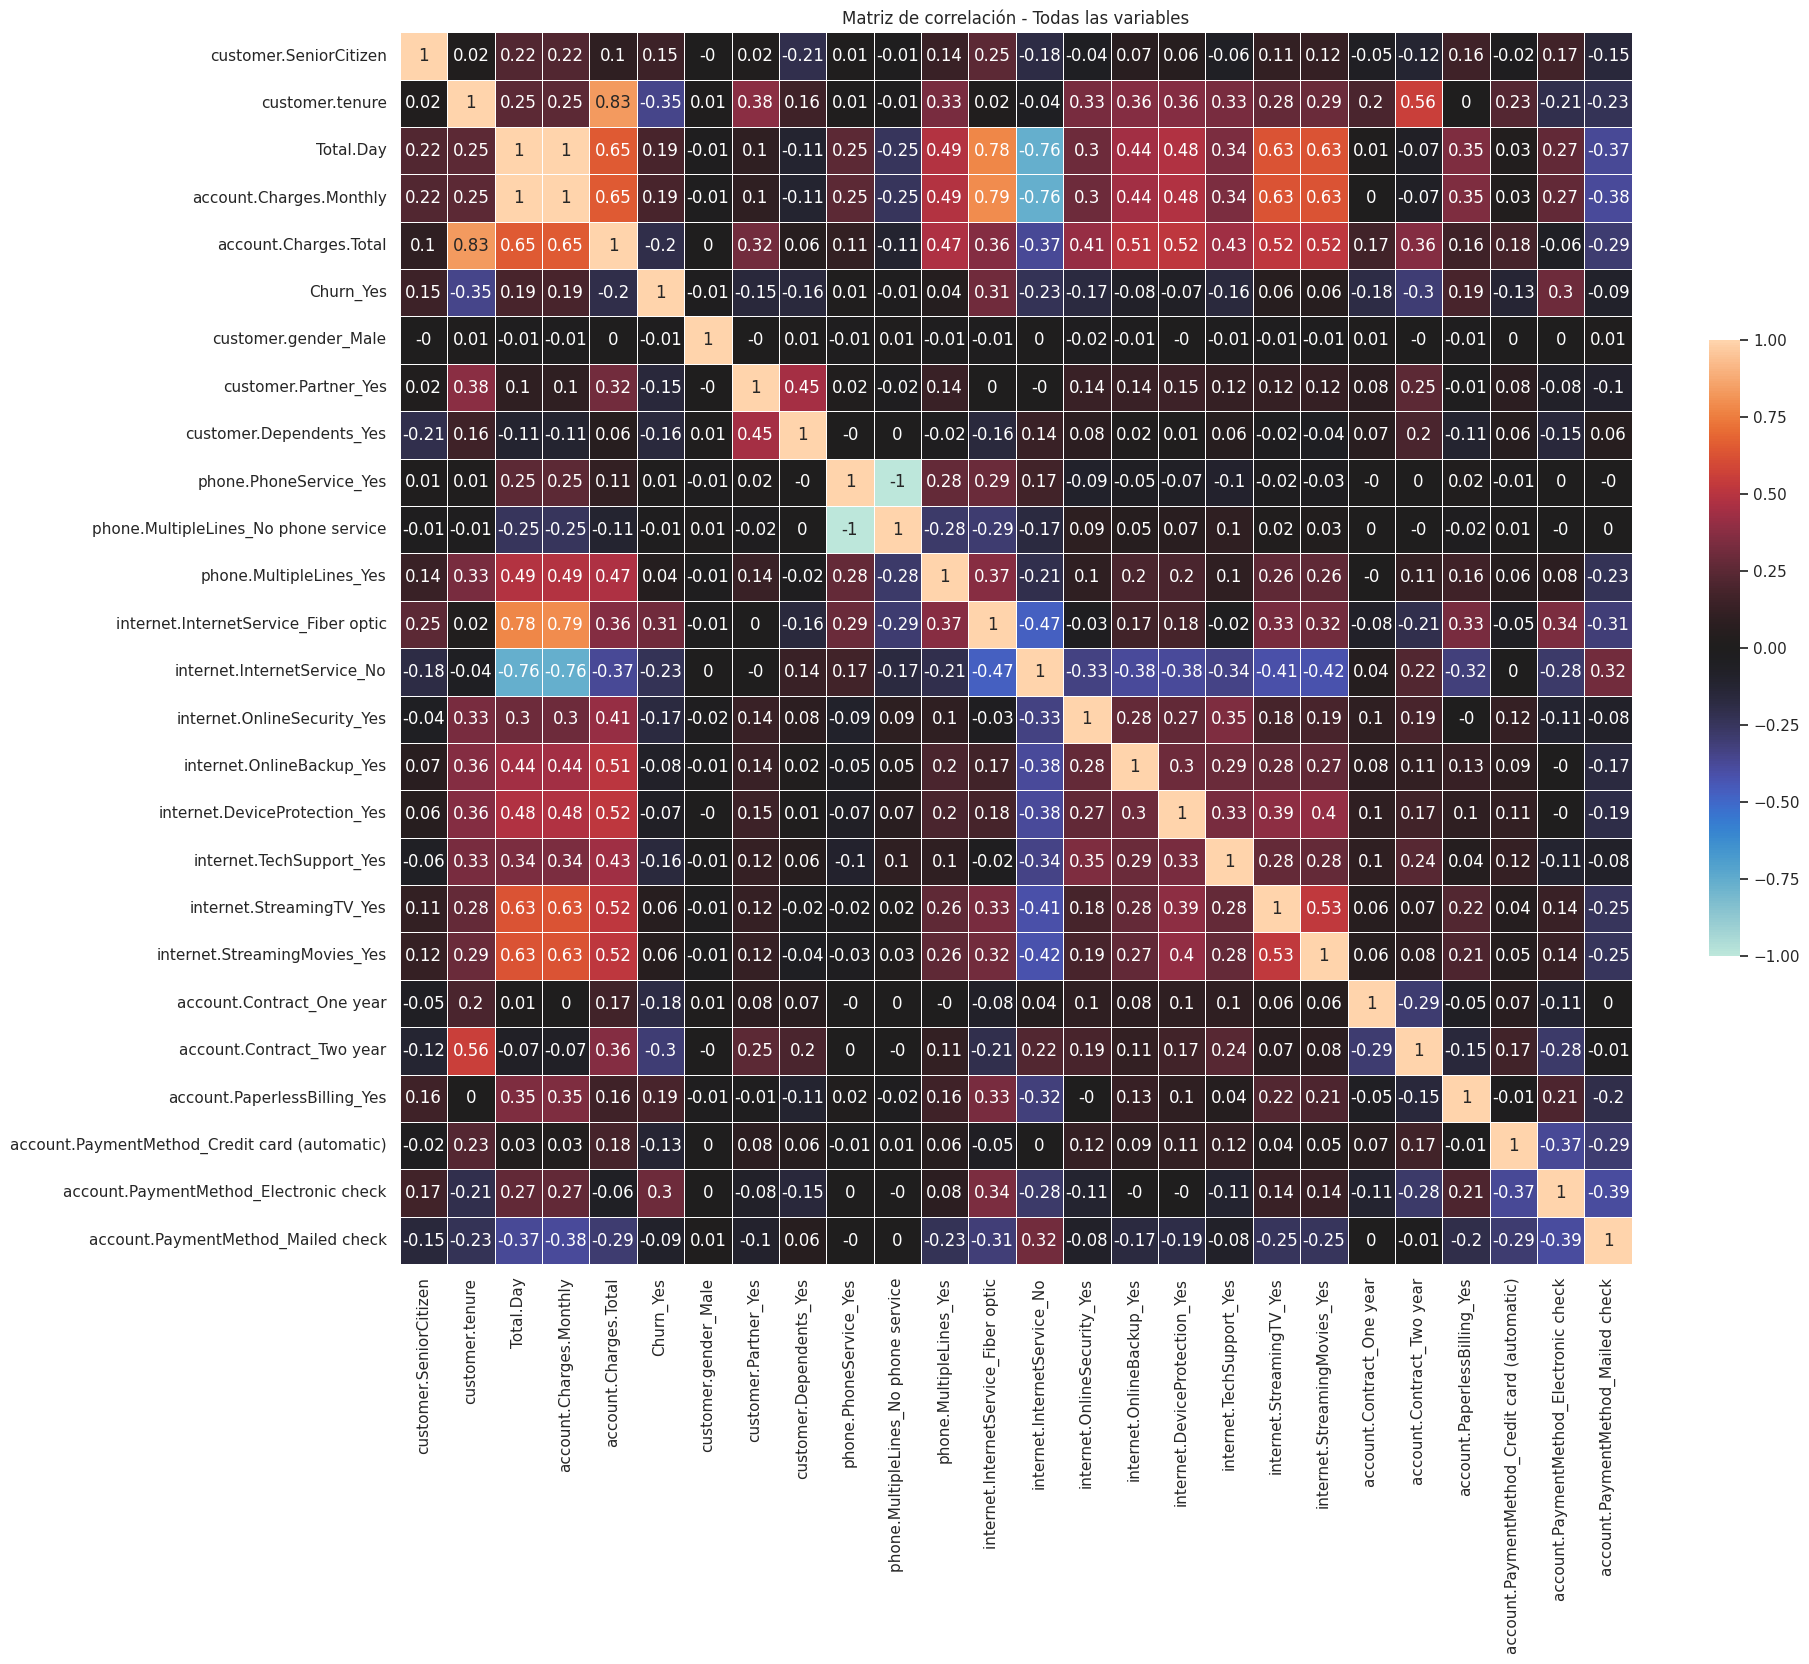

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
corr = df_encoded.corr()

# Heatmap completo
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.title('Matriz de correlación - Todas las variables')
plt.show()

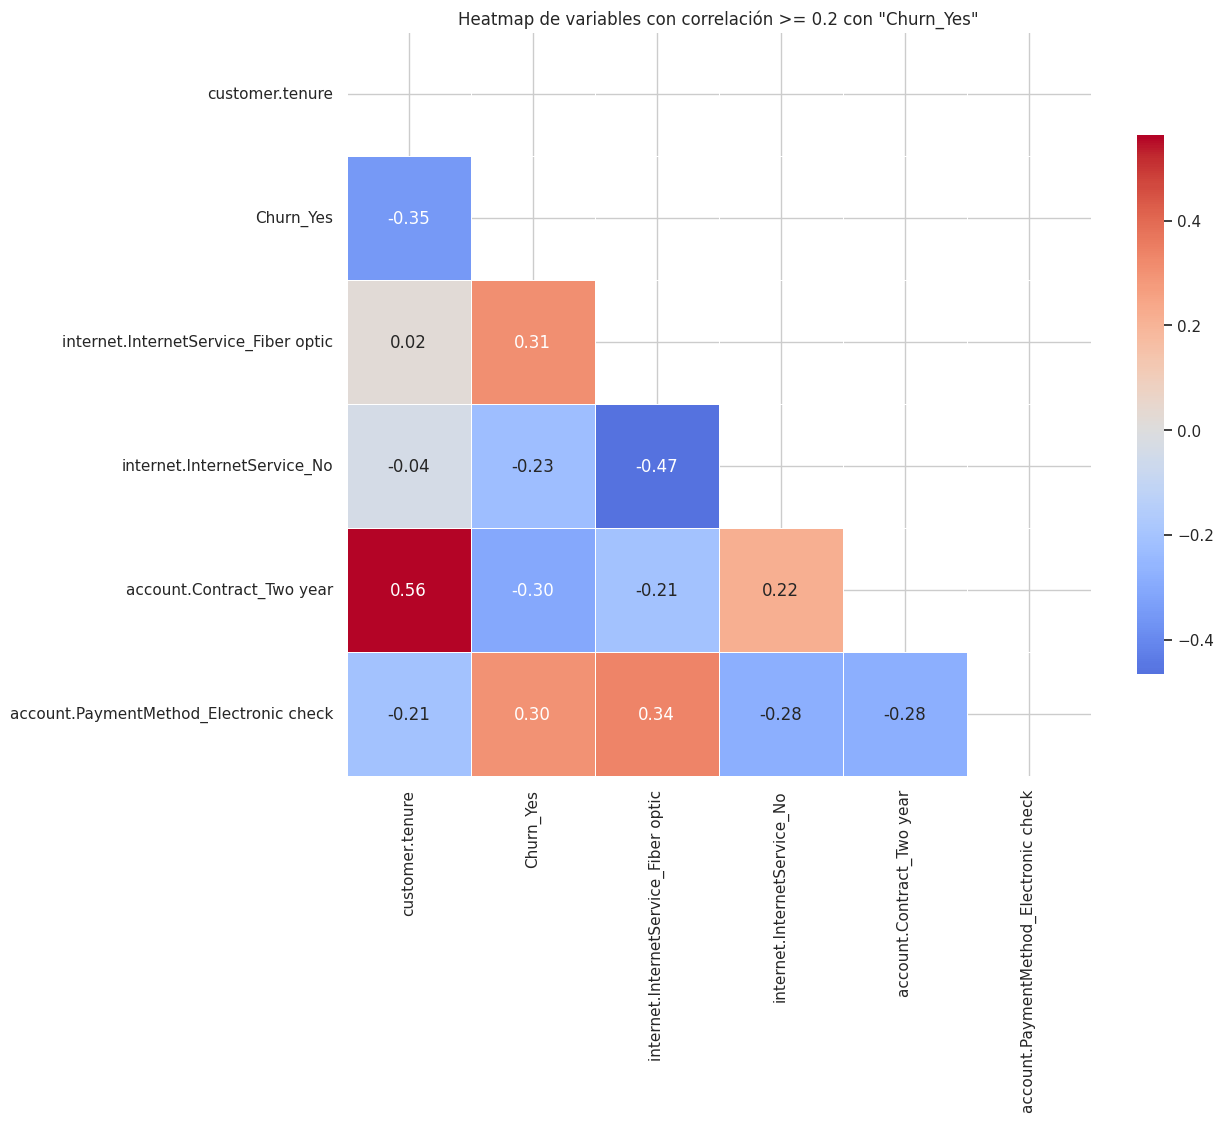

In [ ]:
# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()


✅ Análisis del nuevo heatmap de correlación

## 🧮 Análisis de Multicolinealidad — Variance Inflation Factor (VIF)

- El VIF mide cuánto se incrementa la varianza de los coeficientes de un modelo debido a la correlación entre predictores.
- Regla general:
    - **VIF > 10** → Fuerte multicolinealidad, conviene revisar/eliminar la variable.
    - **VIF entre 5 y 10** → Posible multicolinealidad moderada.
    - **VIF < 5** → Multicolinealidad aceptable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Eliminamos la variable objetivo del cálculo de VIF
X = df_encoded.drop(columns=['Churn_Yes'])

# Agregamos constante para el cálculo
X_const = add_constant(X)

# Convertimos booleanos a float (VIF necesita valores numéricos)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Mostrar resultado ordenado de mayor a menor
vif_data.sort_values(by='VIF', ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


1. Importar las bibliotecas necesarias


✅ **Resumen general del análisis VIF**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |

---

🔍 **Principales alertas en tu resultado**

❗️ 1. `phone.PhoneService_Yes` y `phone.MultipleLines_No phone service` → VIF = `inf`

Estas dos variables **siguen siendo perfectamente colineales entre sí** o con otra variable.

🔍 Causa probable:

* Ambas provienen de **la misma variable categórica original** (`PhoneService`), y el encoding generó **redundancia**.
* Si el cliente **no tiene teléfono**, no puede tener múltiples líneas ⇒ valores 100% ligados.

📌 **Solución recomendada:**

* **Elimina una de estas columnas.** Por ejemplo:

  ```python
  df.drop(columns=["phone.PhoneService_Yes"], inplace=True)
  ```
* O rehacer el encoding con `drop_first=True` para simplificar la estructura.

---

❗️ 2. `account.Charges.Monthly` → VIF = **813.86**

* Esto es extremadamente alto.
* Esta variable está **altamente correlacionada con `account.Charges.Total` y `Total.Day`**.

📌 **Solución:**

* Verifica si `Charges.Monthly`, `Charges.Total` y `Total.Day` contienen **información repetida** (ej.: `Total = Monthly * tenure`).
* Si es así, **elimina una o dos de estas columnas** para evitar redundancia.

---

⚠️ 3. Otros VIFs altos (moderados a severos)

| Variable                          | VIF       | Comentario                                  |
| --------------------------------- | --------- | ------------------------------------------- |
| `InternetService_Fiber optic`     | 137.9     | Altamente colineal con `InternetService_No` |
| `InternetService_No`              | 96.9      | Mismo motivo anterior                       |
| `StreamingTV` / `StreamingMovies` | 22.4–22.5 | Dependen directamente de tener internet     |
| `Charges.Total`                   | 10.8      | Relacionado con `Monthly` y `tenure`        |

📌 **Soluciones combinadas:**

* Mantener **solo una** de las variables entre `InternetService_Fiber optic`, `InternetService_No` o usar `drop_first=True`.
* Evaluar si es necesario mantener **todas** las variables derivadas de internet (streaming, seguridad, etc.).
* Verificar si `Charges.Total` puede ser **recalculado**, si ya existen `Monthly` y `tenure`.

## 🔍 Reducción de Multicolinealidad
1. Partimos del dataset con constante (`X_const`).
2. Eliminamos variables con multicolinealidad perfecta (`VIF = ∞`).
3. Quitamos variables redundantes por derivación (ej. variables numéricas calculadas a partir de otras).
4. Removemos columnas dummy redundantes que sobran de categorías.
5. Recalculamos el VIF con el dataset limpio.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover VIF infinito (colinealidad perfecta) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Colineal con "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante con ausencia de teléfono
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Eliminar redundancias numéricas ======
# Ej: 'Total.Day' y 'Charges.Total' pueden derivar de otras columnas
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Eliminar dummies redundantes ======
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Asegurar que todos los datos son float ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Calcular VIF nuevamente ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_filtered.values, i)
    for i in range(X_filtered.shape[1])
]

# ====== Etapa 7: Mostrar resultado ordenado ======
vif_data.sort_values(by="VIF", ascending=False)


,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


**VIF REHECHO**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


**VIF 2**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


## 🤖 Modelos Predictivos


1. Definimos las variables predictoras (`X_final`) y la variable objetivo (`Churn_Yes`).
2. Dividimos el dataset en entrenamiento y prueba manteniendo la proporción de clases (*stratify*).
3. Estandarizamos las variables numéricas con `StandardScaler`.
4. Balanceamos las clases aplicando **SMOTE** para aumentar la clase minoritaria.
5. Entrenamos dos modelos base:
   - **Regresión Logística** como baseline interpretable.
   - **Random Forest** para capturar relaciones no lineales.
6. Evaluamos el rendimiento usando *Accuracy*, *ROC AUC*, *Classification Report* y matriz de confusión.
7. Comparamos visualmente las curvas ROC de ambos modelos.



🔹 Regresión Logística
Accuracy: 0.7502
ROC AUC: 0.8454

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

Matriz de Confusión:
[[1129  420]
 [ 107  454]]

🔹 Random Forest
Accuracy: 0.7744
ROC AUC: 0.8251

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1549
        True       0.57      0.60      0.59       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.77      0.78      2110

Matriz de Confusión:
[[1295  254]
 [ 222  339]]


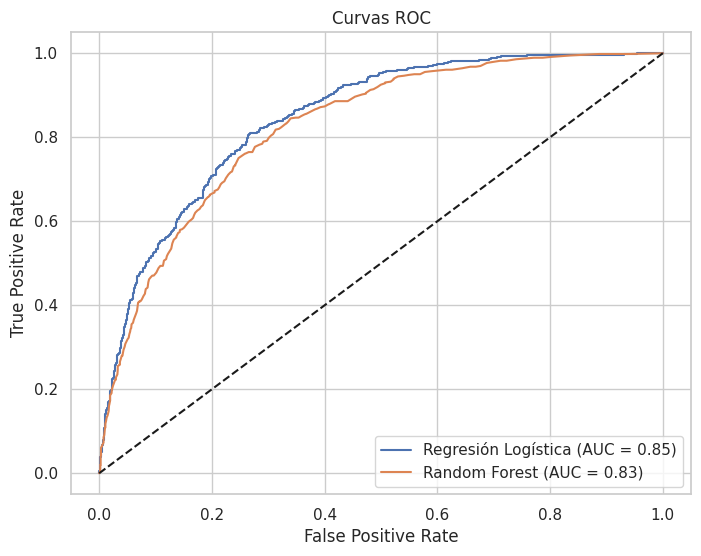

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ====== 1. Variables predictoras y objetivo ======
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# ====== 2. División entrenamiento / prueba ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ====== 3. Escalado de variables ======
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== 4. Balanceo de clases ======
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# ====== 5. Entrenamiento de modelos ======
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

log_reg.fit(X_train_bal, y_train_bal)
rf_clf.fit(X_train_bal, y_train_bal)

# ====== 6. Predicciones y evaluación ======
models = {'Regresión Logística': log_reg, 'Random Forest': rf_clf}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n🔹 {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

# ====== 7. Curvas ROC ======
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar features y target

In [ ]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [ ]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Random Forest**

In [ ]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

